In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from fcmeans import FCM

In [2]:
#pip install fuzzy-c-means

In [3]:
df = pd.read_excel("Data UMKM.xlsx")
df

Status Kepemilikan Tanah               Tujuan Pemasaran  Omset (Juta)  \
0                   Lainnya              Dalam wilayah DIY            10   
1             Milik sendiri  Dalam wilayah Kota Yogyakarta            10   
2                   Lainnya  Dalam wilayah Kota Yogyakarta            25   
3                      Sewa  Dalam wilayah Kota Yogyakarta            25   
4                   Lainnya  Dalam wilayah Kota Yogyakarta            10   
5                   Lainnya              Dalam wilayah DIY            10   
6             Milik sendiri              Dalam wilayah DIY            10   
7             Milik sendiri              Dalam wilayah DIY            10   
8             Milik sendiri  Dalam wilayah Kota Yogyakarta            10   
9             Milik sendiri  Dalam wilayah Kota Yogyakarta            10   
10            Milik sendiri  Dalam wilayah Kota Yogyakarta            10   
11            Milik sendiri              Dalam wilayah DIY            10   
12                     Sewa              Dalam wilayah DIY            85   
13                  Lainnya  Dalam wilayah Kota Yogyakarta            10   
14            Milik sendiri              Dalam wilayah DIY            10   
15                  Lainnya  Dalam wilayah Kota Yogyakarta            10   
16                     Sewa  Dalam wilayah Kota Yogyakarta            10   
17            Milik sendiri              Dalam wilayah DIY            25   
18            Milik sendiri  Dalam wilayah Kota Yogyakarta           120   
19            Milik sendiri              Dalam wilayah DIY            25   

    Tenaga Kerja Kepemilikan Asuransi Kesehatan  
0              0                      Tidak Ada  
1              2                           BPJS  
2              1                      Tidak Ada  
3              0                           BPJS  
4              0                           BPJS  
5              3                      Tidak Ada  
6              0                      Tidak Ada  
7              0                           BPJS  
8              0                      Tidak Ada  
9              0                      Tidak Ada  
10             0                           BPJS  
11             0                      Tidak Ada  
12             0                      Tidak Ada  
13             1                           BPJS  
14             0                      Tidak Ada  
15             1                           BPJS  
16             0                      Tidak Ada  
17             0                           BPJS  
18             5                           BPJS  
19             0                           BPJS

In [4]:
df.columns = ['status_kepemilikan_tanah','tujuan_pemasaran','omset','tenaga_kerja','kepemilikan_asuransi_kesehatan']
df

status_kepemilikan_tanah               tujuan_pemasaran  omset  \
0                   Lainnya              Dalam wilayah DIY     10   
1             Milik sendiri  Dalam wilayah Kota Yogyakarta     10   
2                   Lainnya  Dalam wilayah Kota Yogyakarta     25   
3                      Sewa  Dalam wilayah Kota Yogyakarta     25   
4                   Lainnya  Dalam wilayah Kota Yogyakarta     10   
5                   Lainnya              Dalam wilayah DIY     10   
6             Milik sendiri              Dalam wilayah DIY     10   
7             Milik sendiri              Dalam wilayah DIY     10   
8             Milik sendiri  Dalam wilayah Kota Yogyakarta     10   
9             Milik sendiri  Dalam wilayah Kota Yogyakarta     10   
10            Milik sendiri  Dalam wilayah Kota Yogyakarta     10   
11            Milik sendiri              Dalam wilayah DIY     10   
12                     Sewa              Dalam wilayah DIY     85   
13                  Lainnya  Dalam wilayah Kota Yogyakarta     10   
14            Milik sendiri              Dalam wilayah DIY     10   
15                  Lainnya  Dalam wilayah Kota Yogyakarta     10   
16                     Sewa  Dalam wilayah Kota Yogyakarta     10   
17            Milik sendiri              Dalam wilayah DIY     25   
18            Milik sendiri  Dalam wilayah Kota Yogyakarta    120   
19            Milik sendiri              Dalam wilayah DIY     25   

    tenaga_kerja kepemilikan_asuransi_kesehatan  
0              0                      Tidak Ada  
1              2                           BPJS  
2              1                      Tidak Ada  
3              0                           BPJS  
4              0                           BPJS  
5              3                      Tidak Ada  
6              0                      Tidak Ada  
7              0                           BPJS  
8              0                      Tidak Ada  
9              0                      Tidak Ada  
10             0                           BPJS  
11             0                      Tidak Ada  
12             0                      Tidak Ada  
13             1                           BPJS  
14             0                      Tidak Ada  
15             1                           BPJS  
16             0                      Tidak Ada  
17             0                           BPJS  
18             5                           BPJS  
19             0                           BPJS

In [5]:
d1 = pd.get_dummies(df.status_kepemilikan_tanah)
d1

Lainnya  Milik sendiri  Sewa
0         1              0     0
1         0              1     0
2         1              0     0
3         0              0     1
4         1              0     0
5         1              0     0
6         0              1     0
7         0              1     0
8         0              1     0
9         0              1     0
10        0              1     0
11        0              1     0
12        0              0     1
13        1              0     0
14        0              1     0
15        1              0     0
16        0              0     1
17        0              1     0
18        0              1     0
19        0              1     0

In [6]:
d2 = pd.get_dummies(df.tujuan_pemasaran)
d2

Dalam wilayah DIY  Dalam wilayah Kota Yogyakarta
0                   1                              0
1                   0                              1
2                   0                              1
3                   0                              1
4                   0                              1
5                   1                              0
6                   1                              0
7                   1                              0
8                   0                              1
9                   0                              1
10                  0                              1
11                  1                              0
12                  1                              0
13                  0                              1
14                  1                              0
15                  0                              1
16                  0                              1
17                  1                              0
18                  0                              1
19                  1                              0

In [7]:
d3 = pd.get_dummies(df.kepemilikan_asuransi_kesehatan)
d3

BPJS  Tidak Ada
0      0          1
1      1          0
2      0          1
3      1          0
4      1          0
5      0          1
6      0          1
7      1          0
8      0          1
9      0          1
10     1          0
11     0          1
12     0          1
13     1          0
14     0          1
15     1          0
16     0          1
17     1          0
18     1          0
19     1          0

In [8]:
omset = df['omset']
tenaga_kerja = df['tenaga_kerja']

In [9]:
hasil = pd.concat([d1,d2,d3,omset,tenaga_kerja], axis='columns')
hasil

Lainnya  Milik sendiri  Sewa  Dalam wilayah DIY  \
0         1              0     0                  1   
1         0              1     0                  0   
2         1              0     0                  0   
3         0              0     1                  0   
4         1              0     0                  0   
5         1              0     0                  1   
6         0              1     0                  1   
7         0              1     0                  1   
8         0              1     0                  0   
9         0              1     0                  0   
10        0              1     0                  0   
11        0              1     0                  1   
12        0              0     1                  1   
13        1              0     0                  0   
14        0              1     0                  1   
15        1              0     0                  0   
16        0              0     1                  0   
17        0              1     0                  1   
18        0              1     0                  0   
19        0              1     0                  1   

    Dalam wilayah Kota Yogyakarta  BPJS  Tidak Ada  omset  tenaga_kerja  
0                               0     0          1     10             0  
1                               1     1          0     10             2  
2                               1     0          1     25             1  
3                               1     1          0     25             0  
4                               1     1          0     10             0  
5                               0     0          1     10             3  
6                               0     0          1     10             0  
7                               0     1          0     10             0  
8                               1     0          1     10             0  
9                               1     0          1     10             0  
10                              1     1          0     10             0  
11                              0     0          1     10             0  
12                              0     0          1     85             0  
13                              1     1          0     10             1  
14                              0     0          1     10             0  
15                              1     1          0     10             1  
16                              1     0          1     10             0  
17                              0     1          0     25             0  
18                              1     1          0    120             5  
19                              0     1          0     25             0

In [10]:
df1 = hasil.values
df1

array([[  1,   0,   0,   1,   0,   0,   1,  10,   0],
       [  0,   1,   0,   0,   1,   1,   0,  10,   2],
       [  1,   0,   0,   0,   1,   0,   1,  25,   1],
       [  0,   0,   1,   0,   1,   1,   0,  25,   0],
       [  1,   0,   0,   0,   1,   1,   0,  10,   0],
       [  1,   0,   0,   1,   0,   0,   1,  10,   3],
       [  0,   1,   0,   1,   0,   0,   1,  10,   0],
       [  0,   1,   0,   1,   0,   1,   0,  10,   0],
       [  0,   1,   0,   0,   1,   0,   1,  10,   0],
       [  0,   1,   0,   0,   1,   0,   1,  10,   0],
       [  0,   1,   0,   0,   1,   1,   0,  10,   0],
       [  0,   1,   0,   1,   0,   0,   1,  10,   0],
       [  0,   0,   1,   1,   0,   0,   1,  85,   0],
       [  1,   0,   0,   0,   1,   1,   0,  10,   1],
       [  0,   1,   0,   1,   0,   0,   1,  10,   0],
       [  1,   0,   0,   0,   1,   1,   0,  10,   1],
       [  0,   0,   1,   0,   1,   0,   1,  10,   0],
       [  0,   1,   0,   1,   0,   1,   0,  25,   0],
       [  0,   1,   0,   0, 

In [11]:
#MENGELOMPOKKAN MENJADI 2 CLUSTER

In [12]:
fcmModel = FCM(n_clusters = 2)
fcmModel.fit(df1)
center = fcmModel.centers
center

array([[2.82238822e-04, 5.18750917e-01, 4.80966844e-01, 4.81244744e-01,
        5.18755256e-01, 5.19025222e-01, 4.80974778e-01, 1.03069619e+02,
        2.59126218e+00],
       [3.33967748e-01, 5.56038987e-01, 1.09993265e-01, 4.43999533e-01,
        5.56000467e-01, 4.97607271e-01, 5.02392729e-01, 1.32434318e+01,
        4.46064204e-01]])

In [13]:
pred = fcmModel.predict(df1)
print('Predicted Value for fcmModel is : ' , pred)
pred.shape

Predicted Value for fcmModel is :  [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]


(20,)

In [14]:
#MENCARI KEAKURATAN HASIL PREDIKSI

In [15]:
from sklearn.metrics import silhouette_score
pred = fcmModel.predict(df1)
silh_score_4 = silhouette_score(df1, pred)
print(f'Silhouette Score : {silhouette_score(df1, pred)}')

Silhouette Score : 0.8866292243299483


In [16]:
#MENAMBAH VARIABLE CLUSTER DARI DATA PRED

In [17]:
df['cluster'] = pred
df

status_kepemilikan_tanah               tujuan_pemasaran  omset  \
0                   Lainnya              Dalam wilayah DIY     10   
1             Milik sendiri  Dalam wilayah Kota Yogyakarta     10   
2                   Lainnya  Dalam wilayah Kota Yogyakarta     25   
3                      Sewa  Dalam wilayah Kota Yogyakarta     25   
4                   Lainnya  Dalam wilayah Kota Yogyakarta     10   
5                   Lainnya              Dalam wilayah DIY     10   
6             Milik sendiri              Dalam wilayah DIY     10   
7             Milik sendiri              Dalam wilayah DIY     10   
8             Milik sendiri  Dalam wilayah Kota Yogyakarta     10   
9             Milik sendiri  Dalam wilayah Kota Yogyakarta     10   
10            Milik sendiri  Dalam wilayah Kota Yogyakarta     10   
11            Milik sendiri              Dalam wilayah DIY     10   
12                     Sewa              Dalam wilayah DIY     85   
13                  Lainnya  Dalam wilayah Kota Yogyakarta     10   
14            Milik sendiri              Dalam wilayah DIY     10   
15                  Lainnya  Dalam wilayah Kota Yogyakarta     10   
16                     Sewa  Dalam wilayah Kota Yogyakarta     10   
17            Milik sendiri              Dalam wilayah DIY     25   
18            Milik sendiri  Dalam wilayah Kota Yogyakarta    120   
19            Milik sendiri              Dalam wilayah DIY     25   

    tenaga_kerja kepemilikan_asuransi_kesehatan  cluster  
0              0                      Tidak Ada        1  
1              2                           BPJS        1  
2              1                      Tidak Ada        1  
3              0                           BPJS        1  
4              0                           BPJS        1  
5              3                      Tidak Ada        1  
6              0                      Tidak Ada        1  
7              0                           BPJS        1  
8              0                      Tidak Ada        1  
9              0                      Tidak Ada        1  
10             0                           BPJS        1  
11             0                      Tidak Ada        1  
12             0                      Tidak Ada        0  
13             1                           BPJS        1  
14             0                      Tidak Ada        1  
15             1                           BPJS        1  
16             0                      Tidak Ada        1  
17             0                           BPJS        1  
18             5                           BPJS        0  
19             0                           BPJS        1

In [18]:
df['cluster'].value_counts()

1    18
0     2
Name: cluster, dtype: int64

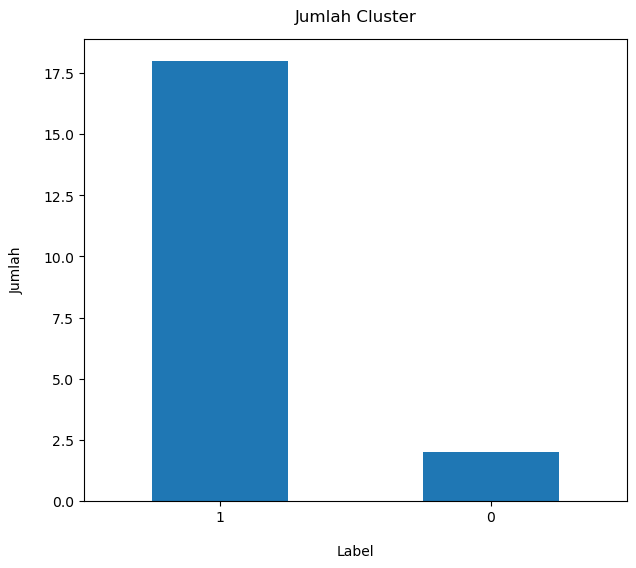

In [19]:
df['cluster'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0);
plt.xlabel('Label', labelpad=14)
plt.ylabel('Jumlah', labelpad=14)
plt.title("Jumlah Cluster", y=1.02);